<a href="https://colab.research.google.com/github/MJaiman/Data-Analytics/blob/main/Finance_Data_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Link: https://drive.google.com/drive/folders/1pV0CwweuEahNgJxTuBA46V3OTj6KjmHL?usp=sharing**

**Importing all necessary libraries**

In [63]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### as data is in the form of excel, use read_excel command

In [64]:
df=pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx',1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Perform Exploratory Data Analysis

In [65]:
df.shape

(5000, 14)

In [66]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [67]:
df.drop(['ID','ZIP Code'],inplace=True,axis=1)

In [68]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [69]:
import plotly.express as px

In [70]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [71]:
!pip install plotly==4.5.2

In [72]:
import plotly.graph_objects as go
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
columns=['Age', 'Experience', 'Income', 'Family', 'Education']
fig = go.Figure()
for col in columns:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()

#### Five point summary suggest that Experience has negative value(This should be fixed). for above box  plot

we can see the Min, Max, mean and std deviation for all key attributes of the dataset
Income has too much noise and slightly skewed right, Age and exp are equally distributed. 


In [74]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [75]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### now visualise Skewness by distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8387ec98d0>,
      dtype=object)

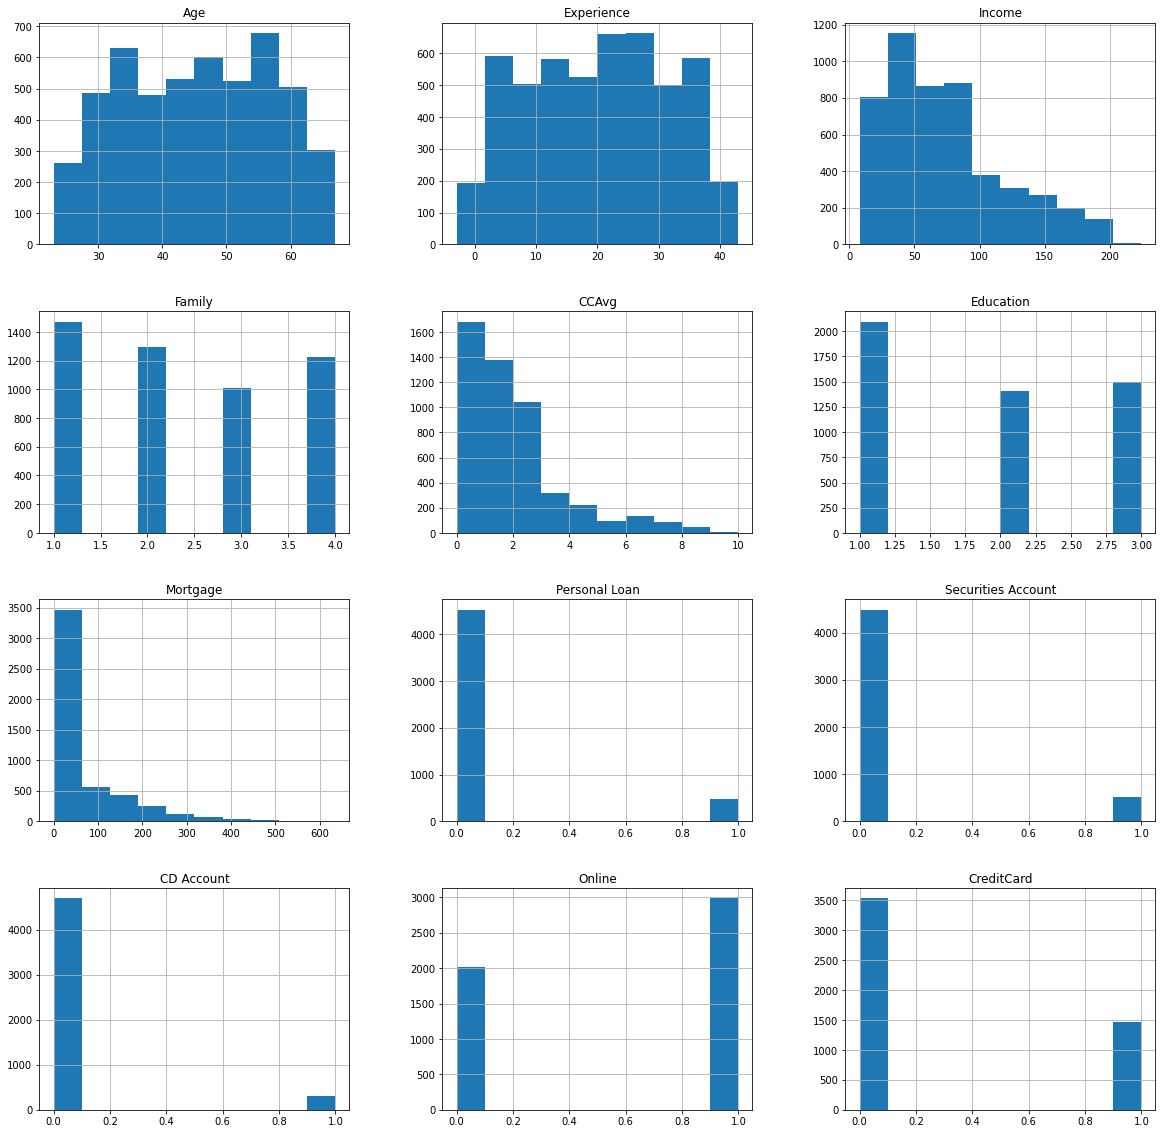

In [76]:
df.hist(figsize=(20,20))

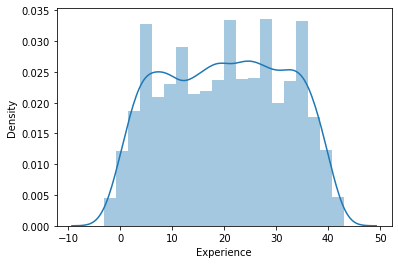

In [77]:
sns.distplot(df['Experience'])


#### INFERENCE from Histogram
    1.Age & Experience are to an extent equally distributed
    2.Income & Credit card spending are skewed to the left
    3.We have more Undergraduates than Graduate and Advanced & Professional
    4.60% of customers have enabled online banking and went digital

In [78]:
df['Experience'].mean()

20.1046

In [79]:
negative_exp=df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


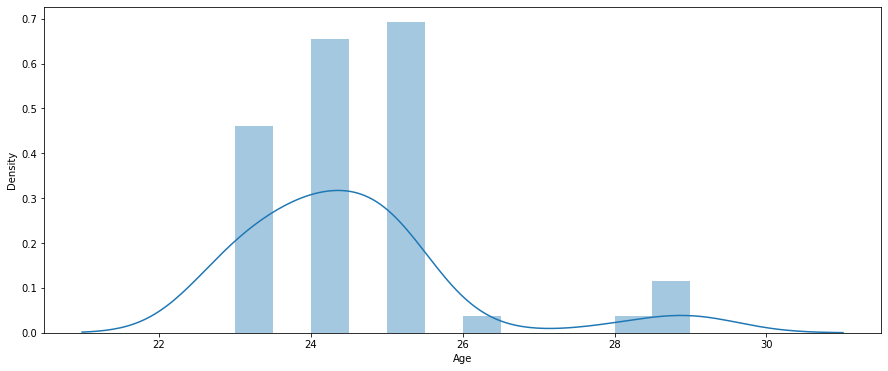

In [80]:
plt.figure(figsize=(15,6))
sns.distplot(negative_exp['Age'])

In [81]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [82]:
negative_exp.size

624

In [83]:
print("There are {} negative values for experience, approx {}%".format(negative_exp.size,negative_exp.size/df.size*100))

There are 624 negative values for experience, approx 1.04%


In [84]:
data=df.copy()

In [85]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### use numpy where function to change the negative values to mean value derived from data with the same age group

In [86]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])


In [87]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


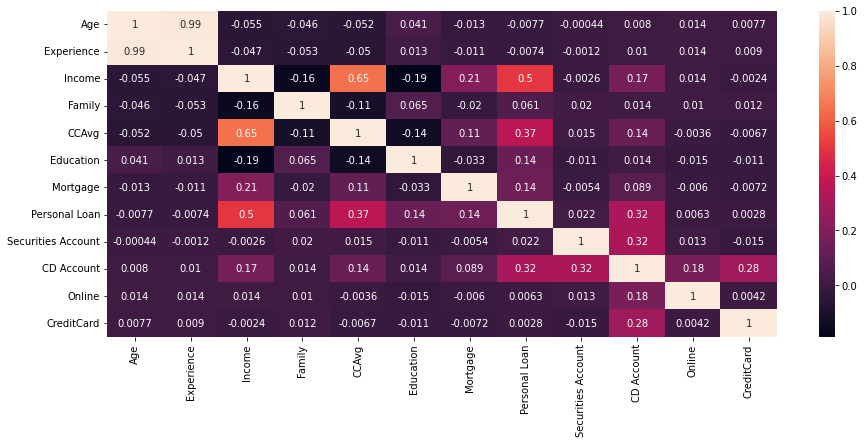

In [88]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

#### We could see that Age & Experience are very strongly correlated,
#### Hence it is fine for us to go with Age and drop Experience to avoid multi-colinearity issue.

In [89]:
data=data.drop(['Experience'],axis=1)

In [90]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [91]:
df['Education'].unique()

array([1, 2, 3])

In [92]:
def mark(x):
  if x==1:
    return 'Undergraduate'
  elif x==2:
    return 'Graduate'
  else:
    return 'Advanced/Professional'

In [93]:
df['Edu_mark']=df['Education'].apply(mark)

In [94]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Edu_mark
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Undergraduate
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Undergraduate
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Undergraduate
3,35,9,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [95]:
EDU_dis = df.groupby("Edu_mark")['Age'].count()

In [96]:
EDU_dis

Edu_mark
Advanced/Professional    1501
Graduate                 1403
Undergraduate            2096
Name: Age, dtype: int64

In [97]:
fig=px.pie(df,values=EDU_dis,names=EDU_dis.index,title="Pie Chart")
fig.show()

#### Inference :We could see that We have more Undergraduates 41.92% than graduates(28.06%) & Advanced Professional(30.02%)

In [98]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [99]:
def securities_CD(row):
  if(row['Securities Account']==1) & (row['CD Account']==1):
    return 'Holds securities & Deposit'
  elif(row['Securities Account']==0) & (row['CD Account']==0):
    return 'Does not Holds securities or Deposit'
  elif(row['Securities Account']==1) & (row['CD Account']==0):
    return 'Only Holds securities'
  elif(row['Securities Account']==0) & (row['CD Account']==1):
    return 'Only Holds Deposit'

In [100]:
data['Account_holder_category']=data.apply(securities_CD,axis=1)

In [101]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Only Holds securities
1,45,34,3,1.5,1,0,0,1,0,0,0,Only Holds securities
2,39,11,1,1.0,1,0,0,0,0,0,0,Does not Holds securities or Deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Does not Holds securities or Deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Does not Holds securities or Deposit


In [102]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['Does not Holds securities or Deposit', 'Only Holds securities',
       'Only Holds Deposit', 'Holds securities & Deposit'],
      dtype='object')

In [103]:
fig=px.pie(df,values=values,names=values.index,title="Pie Chart")
fig.show()

#### We could see that alomst 87% of customers do not hold any securities or deposit, and 3 % hold both securities as well as deposit. It will be good if we encourage those 87% to open any of these account as it will improve the assests of the bank

In [104]:
px.box(data,x='Education',y='Income',facet_col='Personal Loan')

#### Inference:From the above plot we could say that Income of customers who availed personal loan are alomst same irrescpective of their Education

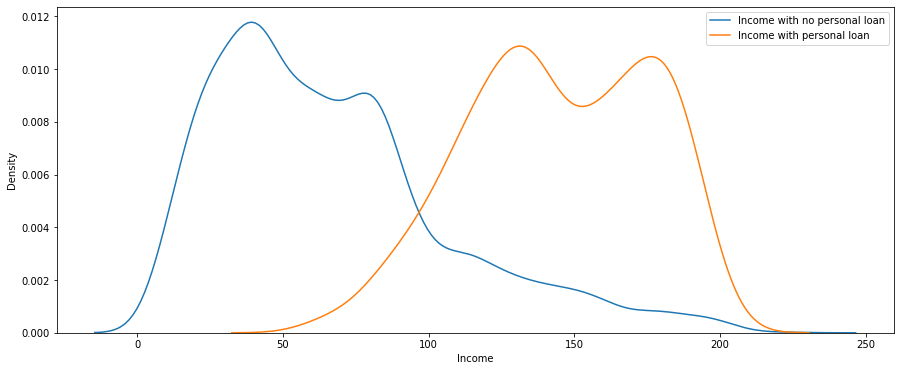

In [105]:
plt.figure(figsize=(15,6))
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label='Income with no personal loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label='Income with personal loan')
plt.legend()

#### Conclusion: Customers Who have availed personal loan seem to have higher income than those who do not have personal loan

In [106]:
#Automating my results
def plot(col1,col2,label1,label2,title):
  plt.figure(figsize=(15,6))
  sns.distplot(data[data[col2]==0][col1],hist=False,label=label1)
  sns.distplot(data[data[col2]==1][col1],hist=False,label=label2)
  plt.title(title)
  plt.legend()

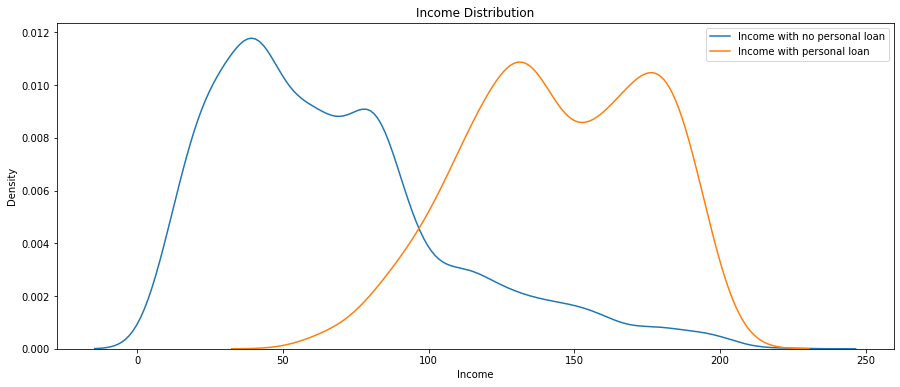

In [107]:
plot('Income','Personal Loan','Income with no personal loan','Income with personal loan','Income Distribution')

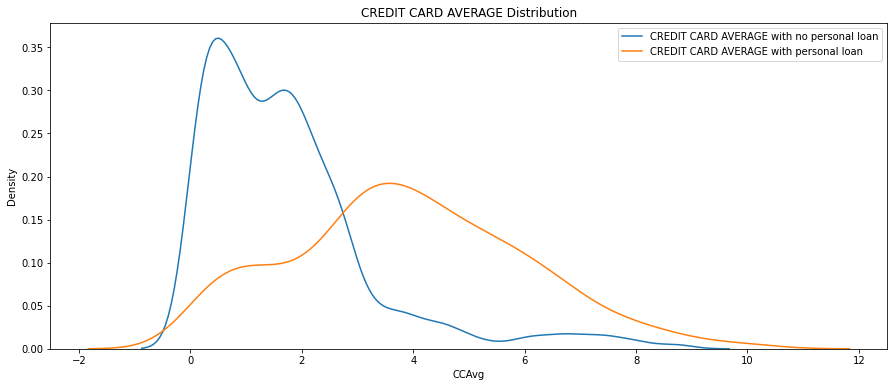

In [108]:
plot('CCAvg','Personal Loan','CREDIT CARD AVERAGE with no personal loan','CREDIT CARD AVERAGE with personal loan','CREDIT CARD AVERAGE Distribution')

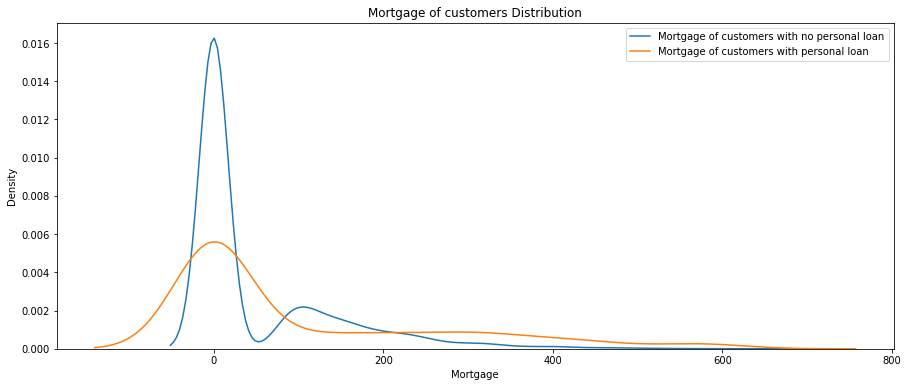

In [109]:
plot( 'Mortgage','Personal Loan','Mortgage of customers with no personal loan','Mortgage of customers with personal loan','Mortgage of customers Distribution')

#### People with high mortgage value, i.e more than 400K have availed personal Loan

In [110]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Account_holder_category'],
      dtype='object')

In [111]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']

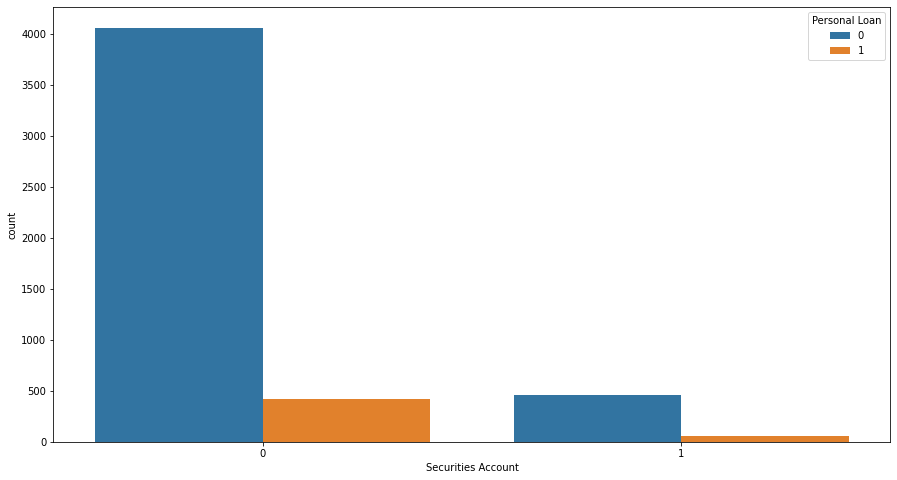

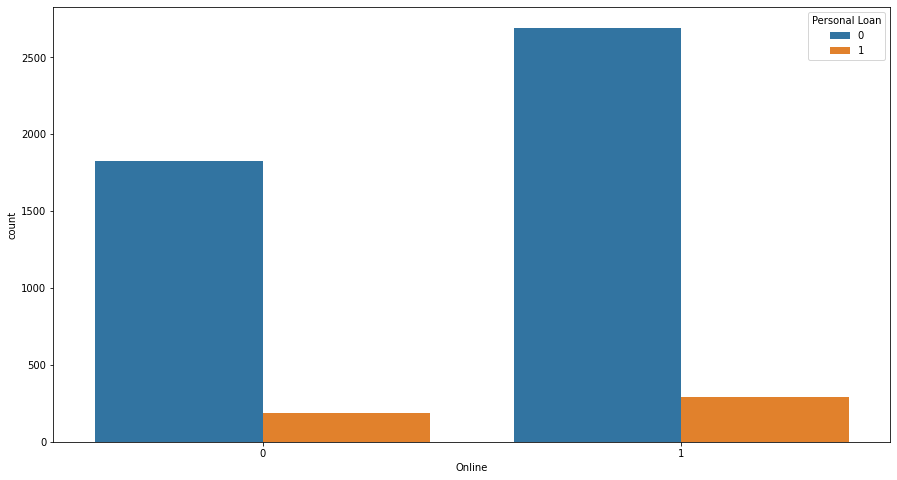

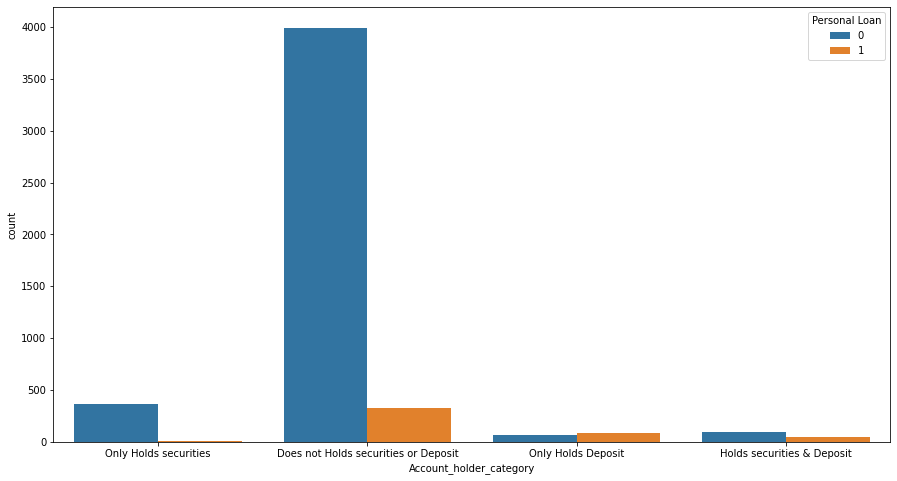

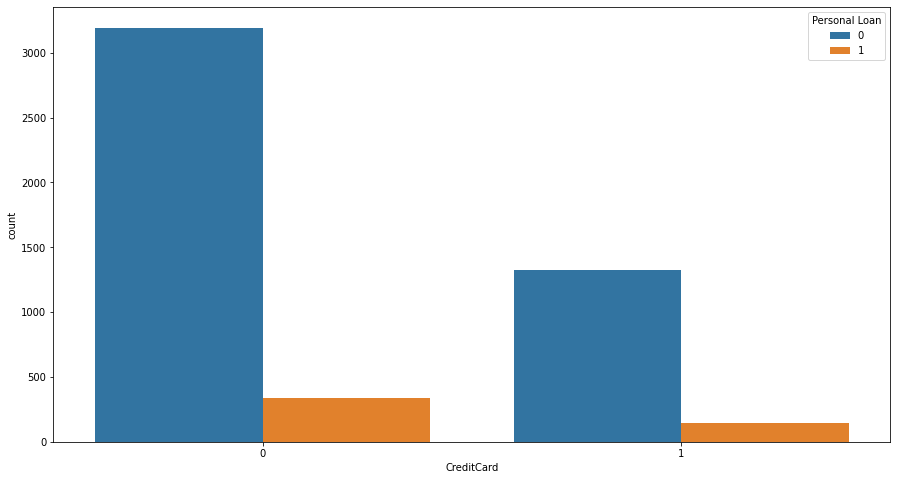

In [112]:
for i in col_names:
  plt.figure(figsize=(15,8))
  sns.countplot(x=i,hue='Personal Loan',data=data)

#### From the above graph we could infer that , customers who hold deposit account & customers who do not hold either a securities account or deposit account have aviled personal loan

#### Perform Hypothesis Testing

### Q.. How Age of a person is going to be a factor in availing loan ??? Does Income of a person have an impact on availing loan ??? Does the family size makes them to avail loan ???¶

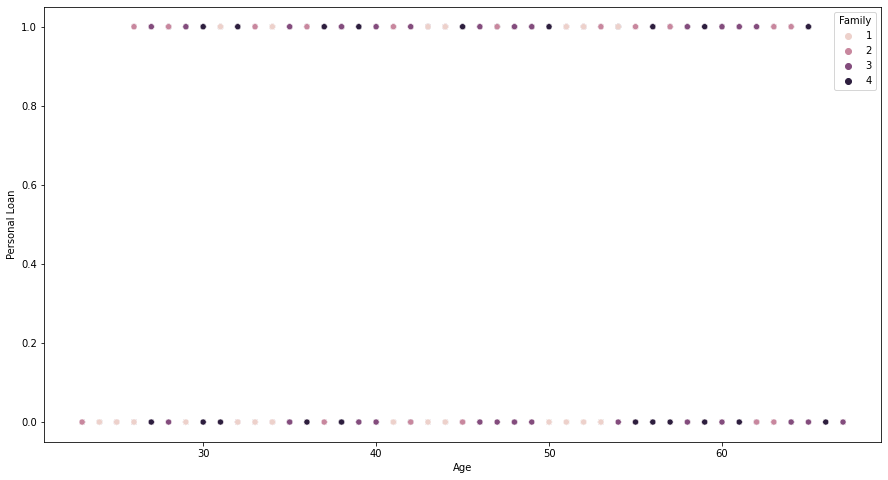

In [113]:
plt.figure(figsize=(15,8))
sns.scatterplot(data['Age'],data['Personal Loan'],hue=data['Family'])

In [114]:
import scipy.stats as stats

In [115]:
Ho='Age does not have impact on availing personal loan'
Ha='Age does  have impact on availing personal loan'

In [116]:
Age_no=np.array(data[data['Personal Loan']==0]['Age'])
Age_yes=np.array(data[data['Personal Loan']==1]['Age'])

In [117]:
t,p_value=stats.ttest_ind(Age_no,Age_yes,axis=0)
if p_value<0.05:
    print(Ha,' as the p_value is less than 0.05 with a value of {}'.format(p_value))
else:
    print(Ho,' as the p_value is greater than 0.05 with a value of {}'.format(p_value))

Age does not have impact on availing personal loan  as the p_value is greater than 0.05 with a value of 0.584959263705325


**AUTOMATE ABOVE RESULT**

In [118]:
def hypothesis(col1,col2,Ho,Ha):
  arr1=np.array(data[data[col1]==0][col2])
  arr2=np.array(data[data[col1]==1][col2])
  t,p_value=stats.ttest_ind(arr1,arr2,axis=0)
  if p_value<0.05:
    print('{}, as the p_value is less than 0.05 with a value of {}'.format(Ha,p_value))
  else:
    print('{}, as the p_value is greater than 0.05 with a value of {}'.format(Ho,p_value))

In [119]:
hypothesis('Personal Loan','Age',Ho='Age does not have impact on availing personal loan',Ha='Age does have impact on availing personal loan')

Age does not have impact on availing personal loan, as the p_value is greater than 0.05 with a value of 0.584959263705325


### Q..Income of a person has significant impact on availing Personal Loan or not?

In [120]:
hypothesis('Personal Loan','Income',Ho='Income does not have impact on availing personal loan',Ha='Income does have impact on availing personal loan')

Income does have impact on availing personal loan, as the p_value is less than 0.05 with a value of 0.0


### Q..Number of persons in the family has significant impact on availing Personal Loan or not?

In [121]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Account_holder_category'],
      dtype='object')

In [122]:
hypothesis('Personal Loan','Family',Ho='Family does not have impact on availing personal loan',Ha='Family does have impact on availing personal loan')

Family does have impact on availing personal loan, as the p_value is less than 0.05 with a value of 1.4099040685673807e-05
